In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [8]:
files = [f"api/batch_{i}_data.csv" for i in range(1, 9)]
data = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)
print(data.shape)

(86918, 8)


In [10]:
#Shortlisting the data Focusing on 5 Sectors with 5 companies each
symbols_req=[
    "AAPL", "GOOGL", "MSFT", "AMZN", "META",
    "TSLA", "F", "GM", "TM",
    "V", "MA", "JPM", "BAC", "WFC", "C",
    "KO", "PEP", "WMT", "COST", "HD",
    "JNJ", "PFE", "MRK", "ABBV", "MRNA", "BIIB",
    "XOM", "PSX", "DUK", "SHEL", "MPC"
]
df=data[data['symbol'].isin(symbols_req)]

In [12]:
df.shape

(13639, 8)

In [14]:
df['symbol'].value_counts()

symbol
MSFT     440
GOOGL    440
PSX      440
XOM      440
MPC      440
SHEL     440
MRNA     440
COST     440
HD       440
WMT      440
ABBV     440
GM       440
C        440
MRK      440
BAC      440
PEP      440
V        440
KO       440
MA       440
JPM      440
TM       440
WFC      440
F        440
JNJ      440
PFE      440
META     440
TSLA     440
AMZN     440
AAPL     440
DUK      440
BIIB     439
Name: count, dtype: int64

In [16]:
# Assigning Sectors to Symbols
technology_it = ["AAPL", "GOOGL", "MSFT", "AMZN", "META"]
automotive_transportation = ["TSLA", "F", "GM", "TM"]
financial_services = ["V", "MA", "JPM", "BAC", "WFC", "C"]
consumer_goods_retail = ["KO", "PEP", "WMT", "COST", "HD"]
healthcare = ["JNJ", "PFE", "MRK", "ABBV", "MRNA", "BIIB"]
energy_utilities = ["XOM", "PSX", "DUK", "SHEL", "MPC"]

# Build a mapping dictionary
symbol_to_sector = {}
for sym in technology_it:
    symbol_to_sector[sym] = "Technology/IT"
for sym in automotive_transportation:
    symbol_to_sector[sym] = "Automotive/Transportation"
for sym in financial_services:
    symbol_to_sector[sym] = "Financial Services"
for sym in consumer_goods_retail:
    symbol_to_sector[sym] = "Consumer Goods/Retail"
for sym in healthcare:
    symbol_to_sector[sym] = "Healthcare"
for sym in energy_utilities:
    symbol_to_sector[sym] = "Energy/Utilities"

# Adding the sector column to your DataFrame
df['sector'] = df['symbol'].map(symbol_to_sector)

df.head()

,symbol,t,o,h,l,c,v,n,sector
0,MSFT,2023-04-03 04:00:00,286.520,288.2700,283.95,287.23,24743342.0,351148,Technology/IT
1,MSFT,2023-04-04 04:00:00,287.230,290.4499,285.67,287.18,25824299.0,351664,Technology/IT
2,MSFT,2023-04-05 04:00:00,285.850,287.1500,282.92,284.34,22064770.0,315075,Technology/IT
3,MSFT,2023-04-06 04:00:00,283.210,292.0800,282.03,291.60,29770334.0,391332,Technology/IT
4,MSFT,2023-04-10 04:00:00,289.208,289.6000,284.71,289.39,23095494.0,320739,Technology/IT


In [18]:
df['sector'].value_counts()

sector
Financial Services           2640
Healthcare                   2639
Technology/IT                2200
Consumer Goods/Retail        2200
Energy/Utilities             2200
Automotive/Transportation    1760
Name: count, dtype: int64

In [20]:
#Changing column names
df.columns = ['symbol', 'timestamp', 'open', 'high', 'low', 'close', 'volume', 'num_trades','sector']
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
# Add date-only column for grouping
df['date'] = df['timestamp'].dt.date
df.drop(['timestamp'],axis=1,inplace=True)
df = df[['sector', 'symbol', 'date', 'open', 'high', 'low', 'close', 'volume', 'num_trades']]

In [22]:
df.head()

,sector,symbol,date,open,high,low,close,volume,num_trades
0,Technology/IT,MSFT,2023-04-03,286.520,288.2700,283.95,287.23,24743342.0,351148
1,Technology/IT,MSFT,2023-04-04,287.230,290.4499,285.67,287.18,25824299.0,351664
2,Technology/IT,MSFT,2023-04-05,285.850,287.1500,282.92,284.34,22064770.0,315075
3,Technology/IT,MSFT,2023-04-06,283.210,292.0800,282.03,291.60,29770334.0,391332
4,Technology/IT,MSFT,2023-04-10,289.208,289.6000,284.71,289.39,23095494.0,320739


In [24]:
df.isnull().sum()#no nulls

sector        0
symbol        0
date          0
open          0
high          0
low           0
close         0
volume        0
num_trades    0
dtype: int64

In [40]:
df.to_csv('stocks_data.csv',index=False)

In [26]:
files = [f"api/test_{i}.csv" for i in range(1, 3)]
data = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)
print(data.shape)

(620, 8)


In [28]:
technology_it = ["AAPL", "GOOGL", "MSFT", "AMZN", "META"]
automotive_transportation = ["TSLA", "F", "GM", "TM"]
financial_services = ["V", "MA", "JPM", "BAC", "WFC", "C"]
consumer_goods_retail = ["KO", "PEP", "WMT", "COST", "HD"]
healthcare = ["JNJ", "PFE", "MRK", "ABBV", "MRNA", "BIIB"]
energy_utilities = ["XOM", "PSX", "DUK", "SHEL", "MPC"]


symbol_to_sector = {}
for sym in technology_it:
    symbol_to_sector[sym] = "Technology/IT"
for sym in automotive_transportation:
    symbol_to_sector[sym] = "Automotive/Transportation"
for sym in financial_services:
    symbol_to_sector[sym] = "Financial Services"
for sym in consumer_goods_retail:
    symbol_to_sector[sym] = "Consumer Goods/Retail"
for sym in healthcare:
    symbol_to_sector[sym] = "Healthcare"
for sym in energy_utilities:
    symbol_to_sector[sym] = "Energy/Utilities"

data['sector'] = data['symbol'].map(symbol_to_sector)

df.head()

,sector,symbol,date,open,high,low,close,volume,num_trades
0,Technology/IT,MSFT,2023-04-03,286.520,288.2700,283.95,287.23,24743342.0,351148
1,Technology/IT,MSFT,2023-04-04,287.230,290.4499,285.67,287.18,25824299.0,351664
2,Technology/IT,MSFT,2023-04-05,285.850,287.1500,282.92,284.34,22064770.0,315075
3,Technology/IT,MSFT,2023-04-06,283.210,292.0800,282.03,291.60,29770334.0,391332
4,Technology/IT,MSFT,2023-04-10,289.208,289.6000,284.71,289.39,23095494.0,320739


In [30]:
data['sector'].value_counts()

sector
Financial Services           120
Healthcare                   120
Technology/IT                100
Consumer Goods/Retail        100
Energy/Utilities             100
Automotive/Transportation     80
Name: count, dtype: int64

In [32]:
data.columns = ['symbol', 'timestamp', 'open', 'high', 'low', 'close', 'volume', 'num_trades','sector']
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['date'] = data['timestamp'].dt.date
data.drop(['timestamp'],axis=1,inplace=True)
data = data[['sector', 'symbol', 'date', 'open', 'high', 'low', 'close', 'volume', 'num_trades']]

In [38]:
data.to_csv('actual_jan.csv')

In [47]:
df1=pd.read_csv('LSTM_Results.csv')
df2=pd.read_csv('ARIMA_Results.csv')
df3=pd.read_csv('LinearRegression_Results.csv')

In [67]:
df1_renamed = df1.rename(columns={'Predicted': 'LSTM'})
df2_renamed = df2.rename(columns={'Forecasted_Price': 'ARIMA'})
df3_renamed = df3.rename(columns={'Predicted': 'Linear_Regression'})

In [69]:
merged = pd.merge(df1_renamed[['Date', 'Actual', 'LSTM']], 
                  df2_renamed[['Date', 'ARIMA']], 
                  on='Date')

merged = pd.merge(merged, df3_renamed[['Date', 'Linear_Regression']], on='Date')

In [71]:
merged.head()

,Date,Actual,LSTM,ARIMA,Linear_Regression
0,2025-01-01,418.58,424.33984,422.228782,418.864965
1,2025-01-02,423.35,420.91960,422.717102,413.922050
2,2025-01-03,427.85,418.03635,423.122524,412.311910
3,2025-01-06,422.37,415.69922,423.499367,412.571342
4,2025-01-07,424.56,413.89655,423.866357,412.926851


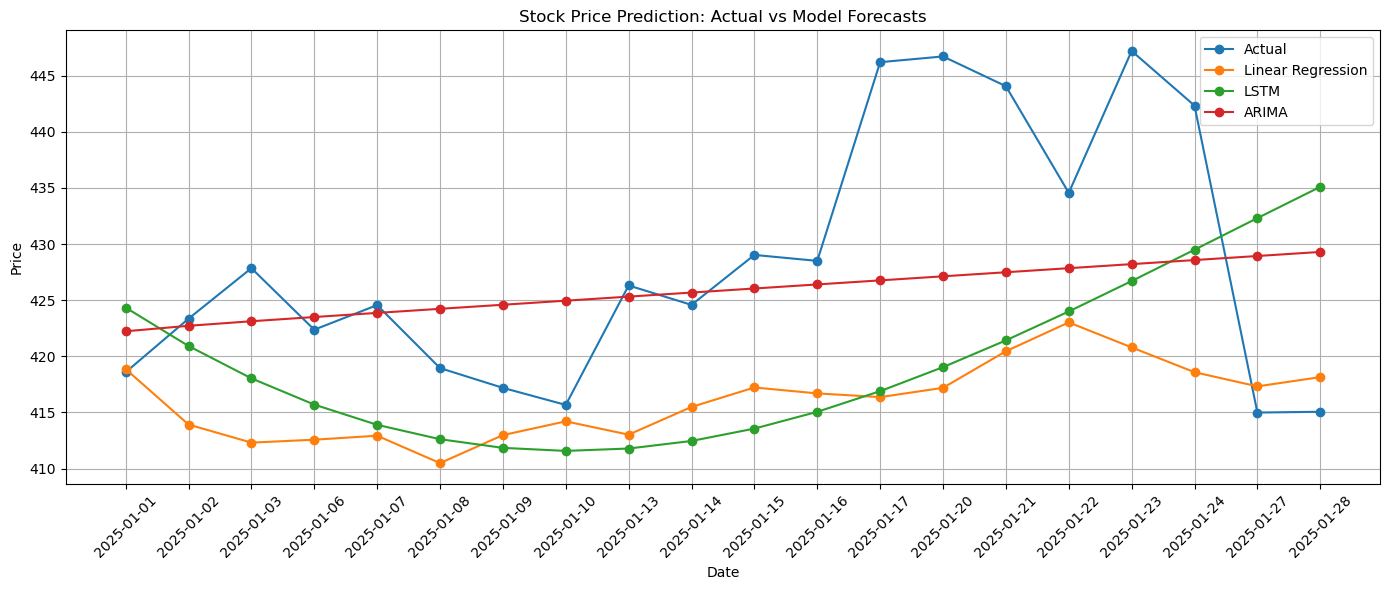

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))

plt.plot(merged['Date'], merged['Actual'], label='Actual', marker='o')
plt.plot(merged['Date'], merged['Linear_Regression'], label='Linear Regression', marker='o')
plt.plot(merged['Date'], merged['LSTM'], label='LSTM', marker='o')
plt.plot(merged['Date'], merged['ARIMA'], label='ARIMA', marker='o')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Prediction: Actual vs Model Forecasts')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()